In [6]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [7]:
# Increase pandas display rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

## In this notebook, I will train a Convolutional Nueral Network on image data representing handwritten numbers and mathematical symbols

### Load Training Data

In [9]:
# Set filepath for training images
filepath = '../image_data/training_images/'

In [10]:
# Load training images as a tensorflow object to feed into the CNN
## Parameters for this function were adapted from documentation found at https://keras.io/api/data_loading/image/

image_dataset = image_dataset_from_directory(
    filepath,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=128,
    image_size=(50, 50),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 97485 files belonging to 13 classes.


In [12]:
image_dataset.class_names

['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'times']

### Create and Train CNN

In [25]:
# Instantiate CNN
model = Sequential()

# convolutional layer with 32 filters.
model.add(Conv2D(32, 3, activation='relu', input_shape=(50, 50, 1)))

# MaxPool
model.add(MaxPooling2D(2))

# Conv block with 0.2 dropout
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Dropout(0.2))

# Conv block with 0.3 dropout
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Dropout(0.3))

# Flatten and output
model.add(Flatten())
model.add(Dense(13, activation='softmax'))

In [26]:
# Compile
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [27]:
# Summarize model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 32)        

In [28]:
# Fit Model
history = model.fit(
    image_dataset,
    validation_data=image_dataset,
    epochs=10
)

Epoch 1/10
762/762 [==============================] - 138s 180ms/step - loss: 0.9647 - acc: 0.7748 - val_loss: 0.1456 - val_acc: 0.9575
Epoch 2/10
762/762 [==============================] - 142s 187ms/step - loss: 0.1064 - acc: 0.9707 - val_loss: 0.1123 - val_acc: 0.9715
Epoch 3/10
762/762 [==============================] - 141s 185ms/step - loss: 0.0656 - acc: 0.9830 - val_loss: 0.0493 - val_acc: 0.9877
Epoch 4/10
762/762 [==============================] - 139s 182ms/step - loss: 0.0482 - acc: 0.9877 - val_loss: 0.0357 - val_acc: 0.9911
Epoch 5/10
762/762 [==============================] - 135s 178ms/step - loss: 0.0382 - acc: 0.9906 - val_loss: 0.0229 - val_acc: 0.9945
Epoch 6/10
762/762 [==============================] - 130s 171ms/step - loss: 0.0323 - acc: 0.9916 - val_loss: 0.0294 - val_acc: 0.9925
Epoch 7/10
762/762 [==============================] - 131s 172ms/step - loss: 0.0301 - acc: 0.9926 - val_loss: 0.0146 - val_acc: 0.9967
Epoch 8/10
762/762 [============================

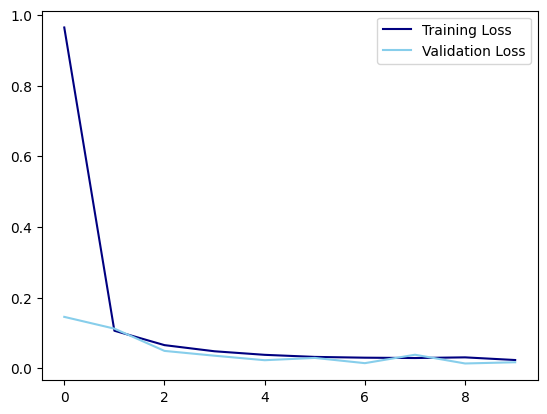

In [30]:
# Print training and validation loss accross epochs
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

### Save Trained Model

In [ ]:
# pickle model to file
filename = '../models/cnn_3layer.pkl'
pickle.dump(model, open(filename, 'wb'))

In [1]:
# validation filepath
val_path = '../image_data/validation_images/'

In [111]:
# Function to create image validation data
# Extracts data from given directory, loads, resizes, and change images to grayscale
# Reshape data and create y labels
def create_training_data(img_dir):
    img_data = []
    labels = []
    for dir in os.listdir(img_dir):
        for file in os.listdir(os.path.join(img_dir, dir)):
            img_path = os.path.join(img_dir, dir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (50, 50), interpolation = cv2.INTER_AREA)
            img = np.array(img)
            img = img.astype('float32')
            #img /= 255
            img_data.append(img)
            labels.append(dir)
    X_train = np.array(img_data, np.float32)
    X_train = X_train.reshape(-1, 50, 50, 1)
    y_train = np.array(labels)
    #y_train = np.array(labels, np.float32)
    return X_train, y_train


In [135]:
X_test = create_testing_data('../image_data/test_images2/')

(88, 50, 50)
